## **Welcome to the Project Notebook**

### Add **data** into the right panel **Data** *input* section and then proceed to the next steps.
#### Type "*geospatial-learn-course-data*" and add it in the input data section

Format to mention them in the code :-

1. Input Data 1 : ../input/geospatial-learn-course-data/Plate_Boundaries
2. Input Data 2 : ../input/geospatial-learn-course-data/earthquakes1970-2014.csv

You can use the following reference codes to define the output colors of the map
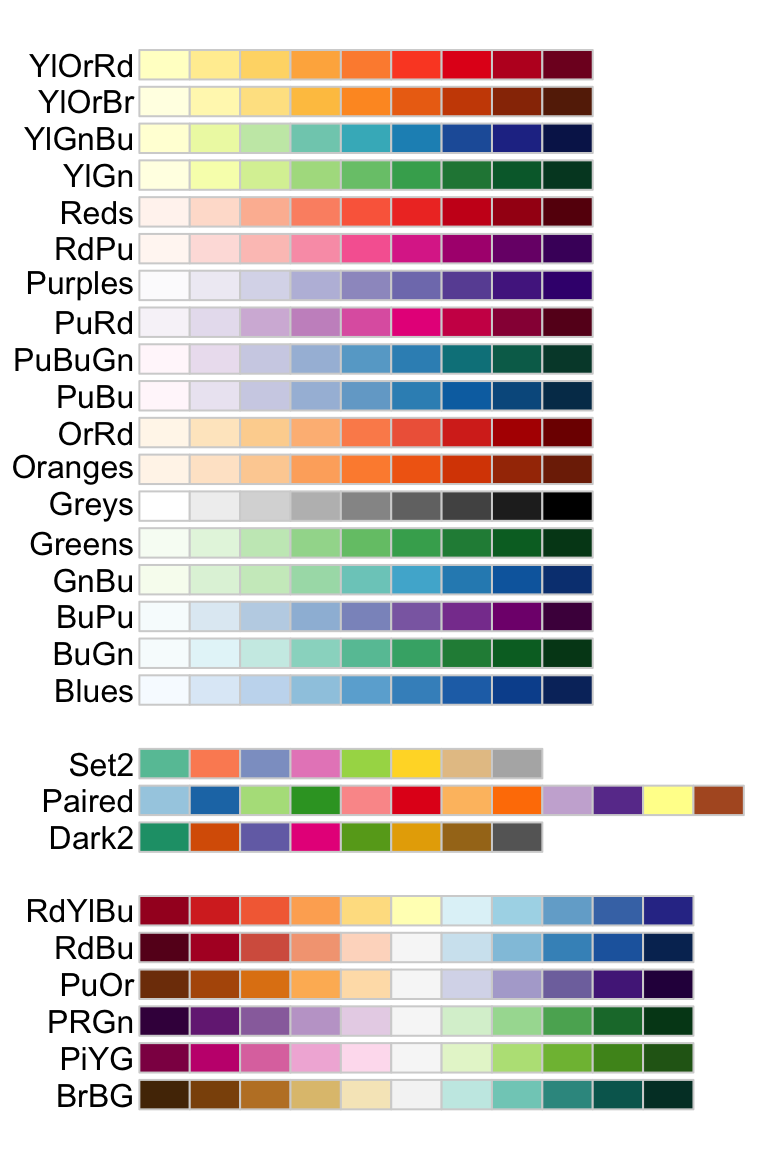

### **At what depth do earthquakes occur? What is the significance of the depth?**

#### Read about it [here](https://www.usgs.gov/faqs/what-depth-do-earthquakes-occur-what-significance-depth?qt-news_science_products=0#qt-news_science_products)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### **Introduction**

In this project, we will be analyzing the specific areas of a country [example: Japan] that needs extra earthquake reinforcement.
We will also determine the areas which are both high in population density and prone to earthquakes?

Before you get started, run the code cell below to set everything up.

In [ ]:
import pandas as pd
import geopandas as gpd

import folium
from folium import Choropleth
from folium.plugins import HeatMap

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex3 import *

We define a function *embed_map()* for displaying interactive maps. It accepts two arguments: the variable containing the map, and the name of the HTML file where the map will be saved.

This function ensures that the maps are visible in all web browsers.

In [ ]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

### 1) Do earthquakes coincide with plate boundaries?

Run the code cell below to create a DataFrame plate_boundaries that shows global plate boundaries. The "coordinates" column is a list of (latitude, longitude) locations along the boundaries.

In [ ]:
plate_boundaries = gpd.read_file("../input/geospatial-learn-course-data/Plate_Boundaries/Plate_Boundaries/Plate_Boundaries.shp")
plate_boundaries['coordinates'] = plate_boundaries.apply(lambda x: [(b,a) for (a,b) in list(x.geometry.coords)], axis='columns')
plate_boundaries.drop('geometry', axis=1, inplace=True)

plate_boundaries.head()

Next, run the code cell below without changes to load the historical earthquake data into a DataFrame earthquakes.

In [ ]:
# Load the data and print the first 5 rows
earthquakes = pd.read_csv("../input/geospatial-learn-course-data/earthquakes1970-2014.csv", parse_dates=["DateTime"])
earthquakes.head()


The code cell below visualizes the plate boundaries on a map. Use all of the earthquake data to add a heatmap to the same map, to determine whether earthquakes coincide with plate boundaries.

In [ ]:
# Create a base map with plate boundaries
m_1 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_1)

# Your code here: Add a heatmap to the map
____


# Show the map
embed_map(m_1, 'q_1.html')

So, given the map above, do earthquakes coincide with plate boundaries?


### 2) Is there a relationship between earthquake depth and proximity to a plate boundary in Japan?
You recently read that the depth of earthquakes tells us important information about the structure of the earth. You're interested to see if there are any intereresting global patterns, and you'd also like to understand how depth varies in Japan.

In [ ]:
m_2 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_2)
    
# Your code here: Add a map to visualize earthquake depth
____


# View the map
embed_map(m_2, 'q_2.html')

Can you detect a relationship between proximity to a plate boundary and earthquake depth? Does this pattern hold globally? In Japan?

### 3) Which prefectures have high population density?
Run the next code cell (without changes) to create a GeoDataFrame prefectures that contains the geographical boundaries of Japanese prefectures.

In [ ]:
# GeoDataFrame with prefecture boundaries
prefectures = gpd.read_file("../input/geospatial-learn-course-data/japan-prefecture-boundaries/japan-prefecture-boundaries/japan-prefecture-boundaries.shp")
prefectures.set_index('prefecture', inplace=True)
prefectures.head()

The next code cell creates a DataFrame stats containing the population, area (in square kilometers), and population density (per square kilometer) for each Japanese prefecture. Run the code cell without changes.

In [ ]:
# DataFrame containing population of each prefecture
population = pd.read_csv("../input/geospatial-learn-course-data/japan-prefecture-population.csv")
population.set_index('prefecture', inplace=True)

# Calculate area (in square kilometers) of each prefecture
area_sqkm = pd.Series(prefectures.geometry.to_crs(epsg=32654).area / 10**6, name='area_sqkm')
stats = population.join(area_sqkm)

# Add density (per square kilometer) of each prefecture
stats['density'] = stats["population"] / stats["area_sqkm"]
stats.head()

Use the next code cell to create a choropleth map to visualize population density.

In [ ]:
# Create a base map
m_3 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

# Your code here: create a choropleth map to visualize population density
____

# View the map
embed_map(m_3, 'q_3.html')

Which three prefectures have relatively higher density than the others? Are they spread throughout the country, or all located in roughly the same geographical region? (If you're unfamiliar with Japanese geography, you might find [this map](https://en.wikipedia.org/wiki/Prefectures_of_Japan) useful to answer the questions.)

### 4) Which high-density prefecture is prone to high-magnitude earthquakes?
Create a map to suggest one prefecture that might benefit from earthquake reinforcement. Your map should visualize both density and earthquake magnitude.

In [ ]:
# Create a base map
m_4 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

# Your code here: create a map
____


# View the map
embed_map(m_4, 'q_4.html')

### CONGRATULATIONS!
#### Your Project is Complete.